## **Simulación de Regresores por Máxima Verosimilitud y Máximo A-Posteriori**

## **Objetivo**
Generar una simulación en Python de los regresores por máxima verosimilitud y máximo a-posteriori discutidos anteriormente, específicamente en la sección 2.1. 

El propósito es ajustar la señal original:

$ t_n = \cos\left(\frac{x_n}{3}\right) + \cos\left(\frac{x_n}{4}\right) + \eta_n, $

donde $x_n \in [0, 24\pi]$, y la señal está contaminada con ruido blanco Gaussiano $\eta_n$ con una relación señal a ruido de $SNRdB= 2[dB]$.

### Supuestos
- Utilizando un mapeo $\phi(\cdot)$ de tipo polinomial de orden $Q$.
- Prior $p(w)$ es una distribución normal $N (w|0, \sigma^2_w)$.

### Datos
- Simula 500 datos para entrenar los modelos.
- Utiliza 200 datos para la predicción.

### Implementación
- Después de generar el mapeo no lineal, se incluye una normalización por `MinMaxScaler()` de `sklearn`.

### Pasos para la Simulación
1. **Generación de Datos**: Simular los 500 datos de entrenamiento y los 200 datos de prueba, contaminados con ruido blanco Gaussiano.
2. **Mapeo Polinomial**: Aplicar un mapeo polinomial de orden $Q$ a los datos.
3. **Normalización**: Normalizar los datos mapeados usando `MinMaxScaler()` de `sklearn`.
4. **Entrenamiento de Modelos**: Entrenar los modelos de regresión por máxima verosimilitud y máximo a-posteriori usando los datos de entrenamiento.
5. **Predicción**: Utilizar los modelos entrenados para predecir los 200 datos de prueba.
6. **Evaluación**: Comparar los resultados de ambos regresores y discutiremos su rendimiento.


Obtenidos los pesos en el punto 2.1, se tiene que :

$W_{ML}=t_{n}^{T} \phi\left (  \phi ^{T}\phi \right )^{-1}$

Se tiene que para MAP :

$W_{MAP}=t_{n}^{T} \phi\left (  \phi ^{T}\phi+\lambda I \right )^{-1}$ siendo
$\lambda= \frac{\sigma ^{2}_{\eta }}{\sigma ^{2}_{\omega}}$

Para convertir la SNR en la potencia del ruido, se debe convertir la SNR de decibelios a una escala lineal (proporcional a la potencia). Esto se hace utilizando la fórmula:
$\text{SNR} = 10 \log_{10} \left( \frac{P_{\text{signal}}}{P_{\text{noise}}} \right)$


**Máxima verosimilitud** es la inferencia paramétrica de un modelo estadístico,probabilidad datos dada una configuración particular de los parámetros, busca representación bajo la observación más probables, trabaja con el producto de las marginales. 

**Máxima a posteriori** Mezcla ML y Bayesianos, busca máximizar la distribució posterior con parametros regularizados o restringidos con un prior que ajusta o penaliza los parámetros. 

**Código con datos iguales**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split

"""
Imports:
    Numpy (np): 
        Utilizado para manejar arreglos y realizar operaciones matemáticas.
    Matplotlib (plt): 
        Permite crear visualizaciones gráficas para la representación de datos.
    PolynomialFeatures, MinMaxScaler: 
        Herramientas de sklearn para transformar características, adecuadas para la preparación de modelos estadísticos.
    train_test_split: 
        Función de sklearn que divide datos en conjuntos de entrenamiento y prueba, validar modelos.
"""

'\nImports:\n    Numpy (np): \n        Utilizado para manejar arreglos y realizar operaciones matemáticas.\n    Matplotlib (plt): \n        Permite crear visualizaciones gráficas para la representación de datos.\n    PolynomialFeatures, MinMaxScaler: \n        Herramientas de sklearn para transformar características, adecuadas para la preparación de modelos estadísticos.\n    train_test_split: \n        Función de sklearn que divide datos en conjuntos de entrenamiento y prueba, validar modelos.\n'

In [12]:
###############################################################################
def generate_data(x_range: tuple, num_samples: int, snr_db: float):
    """
    Genera datos sintéticos con ruido aditivo.

    Parameters
    ----------
    x_range : tuple
        Rango de valores de x (inicio, fin).
    num_samples : int
        Número de muestras a generar.
    snr_db : float
        Relación señal-ruido en decibelios.

    Returns
    -------
    tuple
        x_values : ndarray
            Valores de x.
        noisy_signal : ndarray
            Señal con ruido.
        original_signal : ndarray
            Señal original sin ruido.
    """
    # Genera 'num_samples' valores de x en el rango especificado y los transforma en una columna.
    x_values = np.linspace(x_range[0], x_range[1], num_samples).reshape(-1, 1)
    
    #np.linspace es una función de NumPy que genera un número especificado de valores 
    #igualmente espaciados dentro de un rango determinado.
    
    # Genera la señal original como la suma de dos funciones coseno.
    original_signal = np.cos(x_values / 3) + np.cos(x_values / 4)
    
    # Calcula la varianza del ruido a partir del SNR (Relación Señal-Ruido).
    noise_variance = np.mean(original_signal**2) / (10**(snr_db / 10))
    
    # Genera ruido gaussiano con varianza calculada.
    noise = np.random.normal(0, np.sqrt(noise_variance), size=original_signal.shape)
    
    # Suma el ruido a la señal original para obtener la señal con ruido.
    noisy_signal = original_signal + noise
    
    # Retorna los valores de x, la señal con ruido y la señal original.
    return x_values, noisy_signal, original_signal

###############################################################################
def polynomial_transform(x_values: np.ndarray, degree: int):
    """
    Transforma los datos utilizando características polinomiales y los escala.

    Parameters
    ----------
    x_values : ndarray
        Valores de x.
    degree : int
        Grado del polinomio.

    Returns
    -------
    tuple
        x_poly_scaled : ndarray
            Características polinomiales escaladas.
        scaler : MinMaxScaler
            Escalador utilizado para la transformación.
    """
    # Crea un objeto PolynomialFeatures para generar características polinomiales.
    poly = PolynomialFeatures(degree=degree)
    
    # Genera las características polinomiales a partir de los valores de x.
    x_poly = poly.fit_transform(x_values)
    
    # Crea un escalador MinMaxScaler para normalizar las características.
    scaler = MinMaxScaler()
    
    # Escala las características polinomiales.
    x_poly_scaled = scaler.fit_transform(x_poly)
    
    # Retorna las características escaladas y el escalador utilizado.
    return x_poly_scaled, scaler

###############################################################################
def train_model_ml(design_matrix: np.ndarray, targets: np.ndarray):
    """
    Entrena un modelo de Máxima Verosimilitud (ML).

    Parameters
    ----------
    design_matrix : ndarray
        Matriz de diseño con características polinomiales.
    targets : ndarray
        Valores objetivo (señal con ruido).

    Returns
    -------
    tuple
        weights : ndarray
            Pesos del modelo.
        noise_variance : float
            Varianza del ruido.
    """
    # Calcula los pesos del modelo usando la fórmula de la pseudoinversa.
    weights = np.linalg.pinv(design_matrix.T @ design_matrix) @ design_matrix.T @ targets
    
    # Calcula la varianza del ruido como el promedio de los errores cuadráticos.
    noise_variance = np.mean((targets - design_matrix @ weights)**2)
    
    # Retorna los pesos del modelo y la varianza del ruido.
    return weights, noise_variance

###############################################################################
def predict_ml(design_matrix: np.ndarray, weights: np.ndarray):
    """
    Predice valores utilizando el modelo de Máxima Verosimilitud (ML).

    Parameters
    ----------
    design_matrix : ndarray
        Matriz de diseño con características polinomiales.
    weights : ndarray
        Pesos del modelo.

    Returns
    -------
    ndarray
        Predicciones del modelo.
    """
    # Calcula las predicciones multiplicando la matriz de diseño por los pesos.
    return design_matrix @ weights

###############################################################################
def train_model_map(train_features: np.ndarray, train_targets: np.ndarray, regularization_param: float, poly_degree: int):
    """
    Entrena un modelo de Máxima a Posteriori (MAP).

    Parameters
    ----------
    train_features : ndarray
        Características de entrenamiento.
    train_targets : ndarray
        Valores objetivo de entrenamiento.
    regularization_param : float
        Parámetro de regularización.
    poly_degree : int
        Grado del polinomio.

    Returns
    -------
    ndarray
        Pesos del modelo.
    """
    # Crea un objeto PolynomialFeatures para generar características polinomiales.
    poly = PolynomialFeatures(degree=poly_degree)
    
    # Genera las características polinomiales a partir de las características de entrenamiento.
    poly_train_features = poly.fit_transform(train_features)
    
    # Crea una matriz de identidad escalada por el parámetro de regularización.
    lambda_identity = regularization_param * np.eye(poly_train_features.shape[1])
    
    # Calcula la matriz A que incluye el término de regularización.
    A_matrix = poly_train_features.T @ poly_train_features + lambda_identity
    
    # Calcula el vector b como el producto de las características transpuestas por los valores objetivo.
    b_vector = poly_train_features.T @ train_targets
    
    # Calcula los pesos del modelo usando la fórmula de Máxima a Posteriori.
    model_weights = np.linalg.inv(A_matrix) @ b_vector
    
    # Retorna los pesos del modelo.
    return model_weights

###############################################################################
def predict_map(features: np.ndarray, model_weights: np.ndarray, poly_degree: int, feature_scaler: MinMaxScaler):
    """
    Predice valores utilizando el modelo de Máxima a Posteriori (MAP).

    Parameters
    ----------
    features : ndarray
        Características de entrada.
    model_weights : ndarray
        Pesos del modelo.
    poly_degree : int
        Grado del polinomio.
    feature_scaler : MinMaxScaler
        Escalador de características.

    Returns
    -------
    ndarray
        Predicciones del modelo.
    """
    # Crea un objeto PolynomialFeatures para generar características polinomiales.
    poly = PolynomialFeatures(degree=poly_degree)
    
    # Genera las características polinomiales a partir de las características escaladas.
    poly_features = poly.fit_transform(feature_scaler.transform(features.reshape(-1, 1)))
    
    # Calcula las predicciones multiplicando las características por los pesos del modelo.
    predictions = poly_features @ model_weights
    
    # Retorna las predicciones del modelo.
    return predictions

###############################################################################
def scale_features(features: np.ndarray, targets: np.ndarray):
    """
    Escala las características y los objetivos utilizando MinMaxScaler.

    Parameters
    ----------
    features : ndarray
        Características de entrada.
    targets : ndarray
        Valores objetivo.

    Returns
    -------
    tuple
        scaled_features : ndarray
            Características escaladas.
        scaled_targets : ndarray
            Objetivos escalados.
        feature_scaler : MinMaxScaler
            Escalador de características.
        target_scaler : MinMaxScaler
            Escalador de objetivos.
    """
    # Crea un escalador MinMaxScaler para las características.
    feature_scaler = MinMaxScaler()
    
    # Crea un escalador MinMaxScaler para los objetivos.
    target_scaler = MinMaxScaler()
    
    # Escala las características de entrada.
    scaled_features = feature_scaler.fit_transform(features)
    
    # Escala los objetivos.
    scaled_targets = target_scaler.fit_transform(targets)
    
    # Retorna las características escaladas, los objetivos escalados y los escaladores utilizados.
    return scaled_features, scaled_targets, feature_scaler, target_scaler


In [13]:
# Parámetros de simulación
# Definición del rango de valores de x para la simulación, desde 0 hasta 24*pi.
x_range = (0, 24 * np.pi)

# Definición del número de muestras de entrenamiento a generar.
num_train_samples = 500

# Definición del número de muestras de prueba a generar.
num_test_samples = 200

# Definición del grado del polinomio que se usará en el modelo de Máxima Verosimilitud (ML).
polynomial_degree_ml = 29  # Grado del polinomio para ML

# Definición del grado del polinomio que se usará en el modelo de Máxima a Posteriori (MAP).
polynomial_degree_map = 32  # Grado del polinomio para MAP

# Definición de la relación señal-ruido (SNR) en decibelios para la generación de datos sintéticos.
snr_db = 2  # SNR en decibelios

# Generación de datos de entrenamiento y prueba
# Genera los datos de entrenamiento utilizando la función `generate_data`, con el rango de x, 
# el número de muestras de entrenamiento, y el SNR especificado.
x_train, noisy_train_signal, original_train_signal = generate_data(x_range, num_train_samples, snr_db)

# Genera los datos de prueba utilizando la función `generate_data`, con el rango de x, 
# el número de muestras de prueba, y el SNR especificado.
x_test, noisy_test_signal, original_test_signal = generate_data(x_range, num_test_samples, snr_db)

# Transformación y normalización de los datos para ML
# Aplica una transformación polinomial a los datos de entrenamiento, seguida de una normalización, 
# utilizando el grado de polinomio especificado para ML.
design_matrix_train_ml, scaler_ml = polynomial_transform(x_train, polynomial_degree_ml)

# Aplica la misma transformación y normalización a los datos de prueba usando el mismo escalador 
# que se utilizó en el conjunto de entrenamiento.
design_matrix_test_ml = scaler_ml.transform(PolynomialFeatures(degree=polynomial_degree_ml).fit_transform(x_test))

# Entrenamiento del modelo ML
# Entrena un modelo de Máxima Verosimilitud (ML) utilizando la matriz de diseño de entrenamiento 
# y la señal con ruido correspondiente.
weights_ml, model_variance_ml = train_model_ml(design_matrix_train_ml, noisy_train_signal)

# Predicción en el conjunto de entrenamiento y prueba para ML
# Realiza predicciones en el conjunto de entrenamiento utilizando el modelo ML entrenado.
predicted_train_signal_ml = predict_ml(design_matrix_train_ml, weights_ml)

# Realiza predicciones en el conjunto de prueba utilizando el modelo ML entrenado.
predicted_test_signal_ml = predict_ml(design_matrix_test_ml, weights_ml)

# Cálculo de la varianza de los errores para ML
# Calcula los errores de predicción restando las predicciones a la señal con ruido de entrenamiento.
prediction_errors_ml = noisy_train_signal - predicted_train_signal_ml

# Calcula la varianza de los errores de predicción para el modelo ML.
variance_ml = np.var(prediction_errors_ml)

# Cálculo del Error Cuadrático Medio (MSE) para ML
# Calcula el Error Cuadrático Medio (MSE) en el conjunto de entrenamiento para ML.
mse_train_ml = np.mean((noisy_train_signal - predicted_train_signal_ml)**2)

# Calcula el Error Cuadrático Medio (MSE) en el conjunto de prueba para ML.
mse_test_ml = np.mean((noisy_test_signal - predicted_test_signal_ml)**2)

# Transformación y normalización de los datos para MAP
# Escala las características y los objetivos de entrenamiento para el modelo MAP.
scaled_features_map, scaled_targets_map, feature_scaler_map, target_scaler_map = scale_features(x_train, noisy_train_signal.reshape(-1, 1))

# Aplica la misma escala a las características de prueba usando el escalador que se utilizó en el conjunto de entrenamiento.
scaled_test_features_map = feature_scaler_map.transform(x_test)

# Entrenamiento del modelo MAP
# Define un pequeño parámetro de regularización para el modelo MAP.
regularization_param = 1e-13  # Parámetro de regularización

# Entrena un modelo de Máxima a Posteriori (MAP) utilizando las características escaladas y los objetivos escalados.
model_weights_map = train_model_map(scaled_features_map, scaled_targets_map, regularization_param, polynomial_degree_map)

# Predicción en el conjunto de entrenamiento y prueba para MAP
# Realiza predicciones en el conjunto de entrenamiento utilizando el modelo MAP entrenado.
predicted_train_signal_map = predict_map(x_train, model_weights_map, polynomial_degree_map, feature_scaler_map)

# Realiza predicciones en el conjunto de prueba utilizando el modelo MAP entrenado.
predicted_test_signal_map = predict_map(x_test, model_weights_map, polynomial_degree_map, feature_scaler_map)

# Revertir la normalización de las predicciones para MAP
# Revierten la normalización de las predicciones del conjunto de entrenamiento para MAP.
predicted_train_signal_map_original = target_scaler_map.inverse_transform(predicted_train_signal_map.reshape(-1, 1))

# Revierten la normalización de los objetivos de entrenamiento para MAP.
train_targets_original_map = target_scaler_map.inverse_transform(scaled_targets_map)

# Revierten la normalización de las predicciones del conjunto de prueba para MAP.
predicted_test_signal_map_original = target_scaler_map.inverse_transform(predicted_test_signal_map.reshape(-1, 1))

# Los objetivos originales de prueba para MAP se mantienen como la señal con ruido original.
test_targets_original_map = noisy_test_signal

# Cálculo del Error Cuadrático Medio (MSE) para MAP
# Calcula el Error Cuadrático Medio (MSE) en el conjunto de entrenamiento para MAP.
mse_train_map = np.mean((train_targets_original_map - predicted_train_signal_map_original) ** 2)

# Calcula el Error Cuadrático Medio (MSE) en el conjunto de prueba para MAP.
mse_test_map = np.mean((test_targets_original_map - predicted_test_signal_map_original) ** 2)

# Cálculo de la varianza de los errores para MAP
# Calcula los errores de predicción restando las predicciones a la señal original de prueba.
prediction_errors_map = test_targets_original_map - predicted_test_signal_map_original

# Calcula la varianza de los errores de predicción para el modelo MAP.
variance_map = np.var(prediction_errors_map)


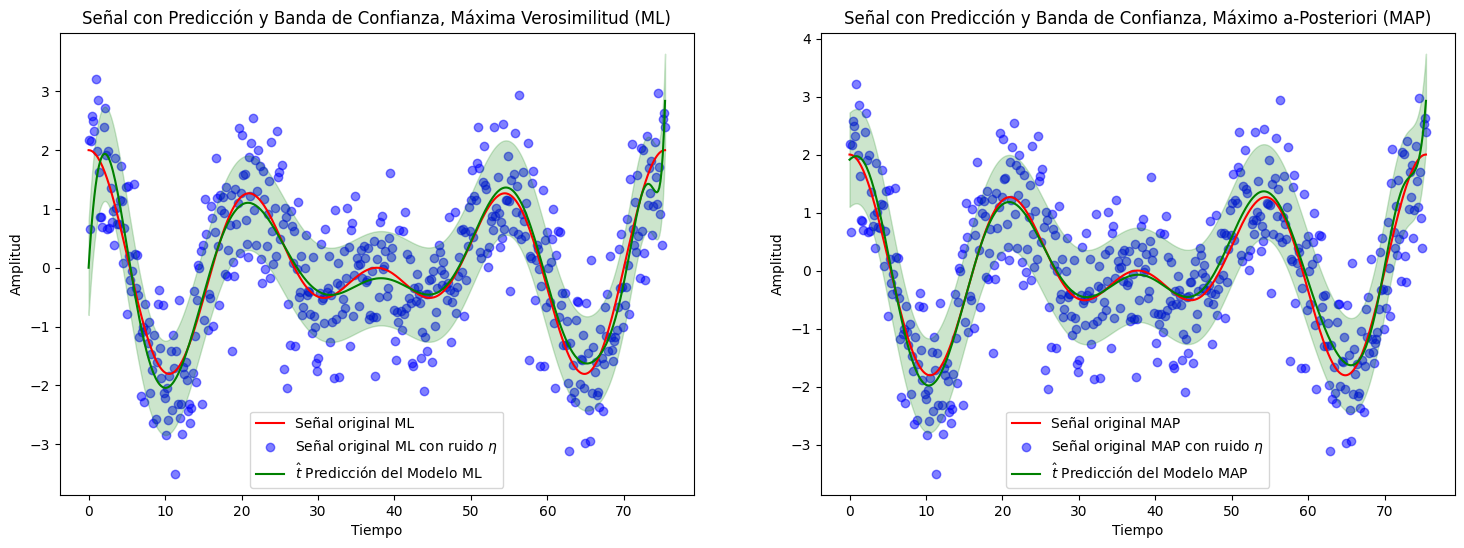

MSE en el conjunto de entrenamiento (ML): 0.6438492176391262
MSE en el conjunto de prueba (ML): 0.7387471862959984
Varianza estimada del modelo (ML) respecto predicción: 0.6436474881638614
MSE en el conjunto de entrenamiento (MAP): 0.6109345612329221
MSE en el conjunto de prueba (MAP): 0.6659305722391903
Varianza estimada del modelo (MAP) respecto predicción: 0.6607966931455413


In [14]:
# Visualización de las predicciones de ML y MAP sobre la señal original sin ruido
plt.figure(figsize=(18, 6))  # Crea una nueva figura con un tamaño específico (18x6 pulgadas).

# Gráfica de ML
plt.subplot(1, 2, 1)  # Crea el primer subplot (1 fila, 2 columnas, primer gráfico).
plt.plot(x_train, original_train_signal, 'r-', label='Señal original ML')  # Grafica la señal original sin ruido en rojo.
plt.scatter(x_train, noisy_train_signal, color='blue', alpha=0.5, label='Señal original ML con ruido $\eta$')  # Grafica la señal con ruido en azul.
plt.plot(x_train, predicted_train_signal_ml, 'g-', label='$\hat{t}$ Predicción del Modelo ML')  # Grafica la predicción del modelo ML en verde.
plt.fill_between(x_train.ravel(), 
                 predicted_train_signal_ml.ravel() - np.sqrt(variance_ml) * np.ones(len(predicted_train_signal_ml)),
                 predicted_train_signal_ml.ravel() + np.sqrt(variance_ml) * np.ones(len(predicted_train_signal_ml)), 
                 color='green', alpha=0.2)  # Rellena la banda de confianza en torno a la predicción ML.
plt.legend()  # Muestra la leyenda para identificar las líneas.
plt.xlabel('Tiempo')  
plt.ylabel('Amplitud')  
plt.title('Señal con Predicción y Banda de Confianza, Máxima Verosimilitud (ML)')  # Título del gráfico.

# Gráfica de MAP
plt.subplot(1, 2, 2)  # Crea el segundo subplot (1 fila, 2 columnas, segundo gráfico).
std_error_map = np.sqrt(variance_map)  # Calcula la desviación estándar de los errores para el modelo MAP.
plt.plot(x_train, original_train_signal, 'r', label='Señal original MAP')  # Grafica la señal original sin ruido en rojo.
plt.scatter(x_train, noisy_train_signal, c='b', alpha=0.5, label='Señal original MAP con ruido $\eta$')  # Grafica la señal con ruido en azul.
plt.plot(x_train, predicted_train_signal_map_original, 'g', label='$\hat{t}$ Predicción del Modelo MAP')  # Grafica la predicción del modelo MAP en verde.
plt.fill_between(x_train.ravel(), 
                 (predicted_train_signal_map_original - std_error_map).ravel(), 
                 (predicted_train_signal_map_original + std_error_map).ravel(), 
                 color='green', alpha=0.2)  # Rellena la banda de confianza en torno a la predicción MAP.
plt.legend()  # Muestra la leyenda para identificar las líneas.
plt.xlabel('Tiempo')  
plt.ylabel('Amplitud') 
plt.title('Señal con Predicción y Banda de Confianza, Máximo a-Posteriori (MAP)')  

plt.show()  # Muestra las gráficas generadas.

# Impresión de resultados de métricas de desempeño para ML y MAP
print(f"MSE en el conjunto de entrenamiento (ML): {mse_train_ml}") 
print(f"MSE en el conjunto de prueba (ML): {mse_test_ml}") 
print(f"Varianza estimada del modelo (ML) respecto predicción: {variance_ml}")  

print(f"MSE en el conjunto de entrenamiento (MAP): {mse_train_map}")  
print(f"MSE en el conjunto de prueba (MAP): {mse_test_map}") 
print(f"Varianza estimada del modelo (MAP) respecto predicción: {variance_map}")
